In [1]:
import matplotlib.pyplot as plt
import numpy as np
from read_dat import *

file = read_dat('../Data/AmBe.dat', align_method='max')

init complete


In [2]:
L=[]
S=[]
for i in range(20000):
    event = file.read_event()
    S.append(event[0].get_pulse_shape())
    L.append(event[0].get_long_integral())

In [2]:
# %matplotlib tk
# file.add_selections(L, S, mode='m')
file.add_selections(mode='p', file='AmBe_cuts.csv')

Selections Imported
Polygons Created


In [3]:
file.lst_out(events=False, ch=[0], output=True, traces=False, cuts=[1], inc=[1], filename='AmBe_lst_out_gamma.csv')

1000 events
2000 events
2000 events
3000 events
4000 events
5000 events
6000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
11000 events
11000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
18000 events
19000 events
20000 events
21000 events
22000 events
22000 events
23000 events
23000 events
23000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
30000 events
31000 events
32000 events
33000 events
34000 events


/home/mkidson/gitRepos/dDAQ_dev/radical_changes/event.py:102: RuntimeWarning: invalid value encountered in scalar divide
  return self.shortIntegral / self.longIntegral


35000 events
35000 events
36000 events
37000 events
37000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
44000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
50000 events
51000 events
52000 events
53000 events
54000 events
55000 events
56000 events
57000 events
57000 events
58000 events
59000 events
60000 events
61000 events
62000 events
62000 events
63000 events
64000 events
65000 events
66000 events
67000 events
68000 events
69000 events
70000 events
71000 events
72000 events
73000 events
73000 events
73000 events
74000 events
74000 events
75000 events
76000 events
76000 events
77000 events
77000 events
78000 events
79000 events
80000 events
81000 events
82000 events
83000 events
84000 events
85000 events
85000 events
86000 events
87000 events
88000 events
88000 events
88000 events
89000 events
90000 events
91000 events
92000 events
93000 events
93000 events
93000 events

In [4]:
file = open(f'AmBe_lst_out_gamma.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []
S = []

for row in reader:
    L.append(float(row[0]))
    S.append(float(row[1]))

L = np.array(L)
S = np.array(S)

['../Data/AmBe channel 0, False events, cuts [1]']
['L [ch]', 'S[ch]', 'T (trigger) [us]', 'baseline', 'pulse height [bits]']


(array([1., 1., 1., ..., 0., 1., 1.]),
 array([  139.4       ,   145.72634836,   152.05269673, ...,
        43057.34730327, 43063.67365164, 43070.        ]),
 <BarContainer object of 6786 artists>)

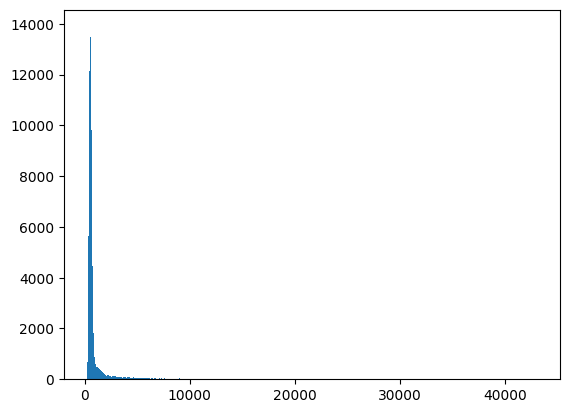

In [6]:
plt.hist(L, bins='auto')

(array([[  0.,   0.,   0., ..., 140., 170., 147.],
        [  1.,   1.,   3., ..., 525., 505., 525.],
        [  0.,   0.,   0., ...,  29.,  21.,  19.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  139.4       ,   307.09765625,   474.7953125 ,   642.49296875,
          810.190625  ,   977.88828125,  1145.5859375 ,  1313.28359375,
         1480.98125   ,  1648.67890625,  1816.3765625 ,  1984.07421875,
         2151.771875  ,  2319.46953125,  2487.1671875 ,  2654.86484375,
         2822.5625    ,  2990.26015625,  3157.9578125 ,  3325.65546875,
         3493.353125  ,  3661.05078125,  3828.7484375 ,  3996.44609375,
         4164.14375   ,  4331.84140625,  4499.5390625 ,  4667.23671875,
         4834.934375  ,  5002.63203125,  5170.3296875 ,  5338.02734375,
         5505.725     ,  5673.42265625,  5841.1203125 ,  6008.81796875,
         6176.515625  ,  6344.2

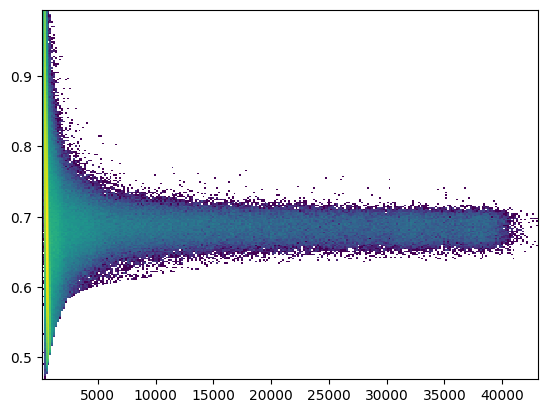

In [5]:
plt.hist2d(L, S, [256,256], norm=colors.LogNorm(vmin=1))